<a href="https://colab.research.google.com/github/AlexDaciuk/Algoritmos/blob/master/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import base64

token = base64.b64decode("Njk4ZGVjMWE5Y2YyNDQ5ZmNhY2FkOWU4NDdjMDk5NWU1NTZhMDk5Yw====").decode("utf-8")

! rm -rf tp-datos-2c2020 datos
! git clone https://{token}@github.com/AlexDaciuk/tp-datos-2c2020.git
! mv tp-datos-2c2020 datos

from datos.preproc import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot as plt
from sklearn.tree import plot_tree
import pandas as pd

Cloning into 'tp-datos-2c2020'...
remote: Enumerating objects: 135, done.
remote: Counting objects: 100% (135/135), done.
remote: Compressing objects: 100% (102/102), done.
remote: Total 370 (delta 63), reused 94 (delta 33), pack-reused 235
Receiving objects: 100% (370/370), 9.39 MiB | 27.09 MiB/s, done.
Resolving deltas: 100% (191/191), done.


In [ ]:
df_all = preprocessing.get_data()

# **KNN**

In [ ]:
df_knn = preprocessing.knn_preproc(df_all)

In [ ]:
# Separate test and train data
X_train, X_test, y_train, y_test = train_test_split(df_knn.drop('volveria', 1), df_knn['volveria'])

{'n_neighbors': 4, 'weights': 'uniform'}
El score general del modelo es 0.8507462686567164
La media del cross validation score con k=10 es 0.8083333333333333
El accuracy del modelo es 0.8507462686567164
La precision del modelo es 0.9310344827586207
El recall del modelo es 0.675
El f1 del modelo es 0.7826086956521738


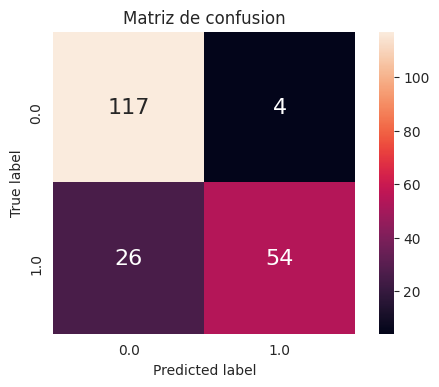

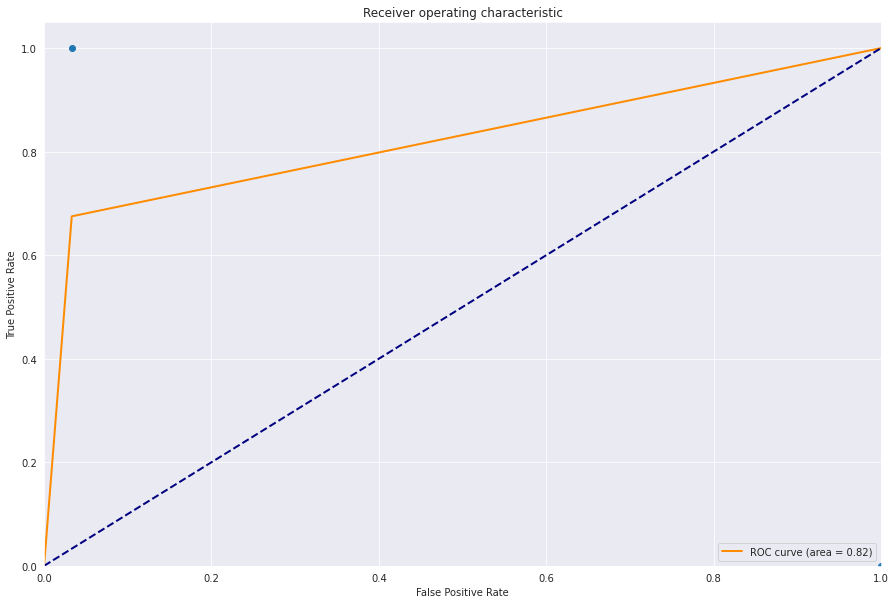

In [ ]:
# Inicializo el clasificador
parameters = {'n_neighbors': [1,2,3,4,5,6,7,8,9,10], 'weights' : ('uniform', 'distance')}
gscv = GridSearchCV(KNeighborsClassifier(), parameters)

gscv.fit(X_train, y_train)
print(gscv.best_params_)

preprocessing.report(gscv, X_train, y_train, X_test, y_test)